In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy.fft as fft

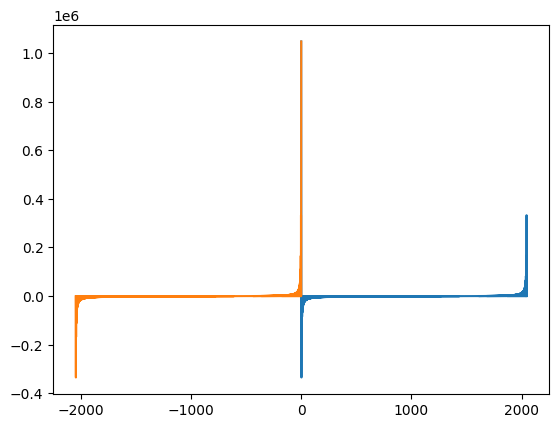

<Axes: >

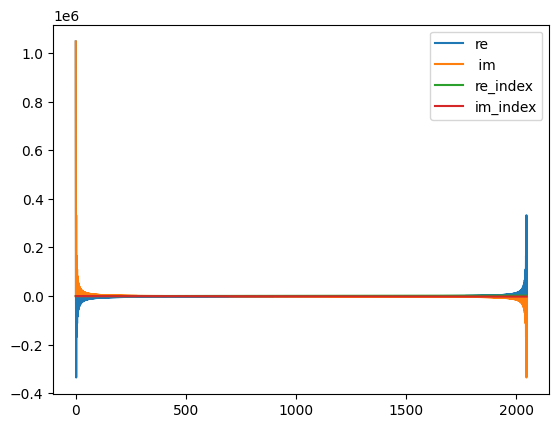

In [37]:
df_x = pd.read_csv("x.csv")
df_x.head()
df_x["re_index"] = [i for i in range(len(df_x["re"]))]
df_x["im_index"] = [-i for i in range(len(df_x["re"]))]

plt.plot(df_x["re_index"], df_x["re"])
plt.plot(df_x["im_index"], df_x[" im"])
plt.show()

df_x.plot()


<Axes: >

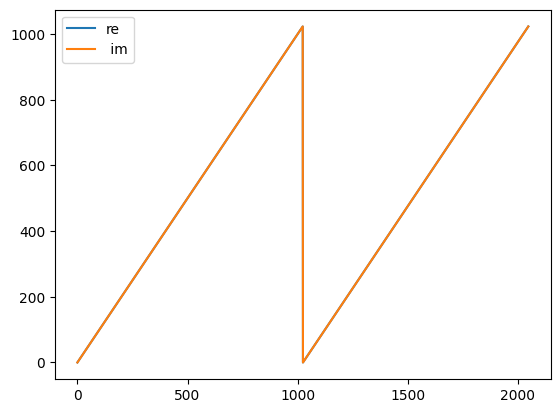

In [28]:

df_original = pd.read_csv("x_original.csv")
df_original.head()
df_original.plot()

[0.0, -334795.15625, 0.0, -167908.0, 0.0, -112278.257812, 0.0, -84462.859375, 0.0, -67773.210938, 0.0, -56646.414062, 0.0, -48698.425781, 0.0, -42737.144531, 0.0, -38100.355469, 0.0, -34390.75, 0.0, -31355.40625, 0.0, -28825.78125, 0.0, -26685.171875, 0.0, -24850.212891, 0.0, -23259.775391, 0.0, -21868.001953, 0.0, -20639.859375, 0.0, -19548.035156, 0.0, -18571.052734, 0.0, -17691.660156, 0.0, -16895.917969, 0.0, -16172.416992, 0.0, -15511.741211, 0.0, -14906.03125, 0.0, -14348.691406, 0.0, -13834.154297, 0.0, -13357.644531, 0.0, -12915.101562, 0.0, -12503.0, 0.0, -12118.308594, 0.0, -11758.354492, 0.0, -11420.847656, 0.0, -11103.724609, 0.0, -10805.201172, 0.0, -10523.671875, 0.0, -10257.714844, 0.0, -10006.089844, 0.0, -9767.647461, 0.0, -9541.382812, 0.0, -9326.375, 0.0, -9121.802734, 0.0, -8926.924805, 0.0, -8741.061523, 0.0, -8563.597656, 0.0, -8393.976562, 0.0, -8231.681641, 0.0, -8076.249512, 0.0, -7927.247559, 0.0, -7784.287109, 0.0, -7646.998047, 0.0, -7515.057129, 0.0, -7388.

array([-2.38227538e-05  +0.j        , -5.11748893e+02  +1.90684074j,
        5.11214739e+02-511.78409288j, ..., -5.11739386e+02  -4.72033898j,
        5.11214739e+02+511.78409288j, -5.11748893e+02  -1.90684074j])

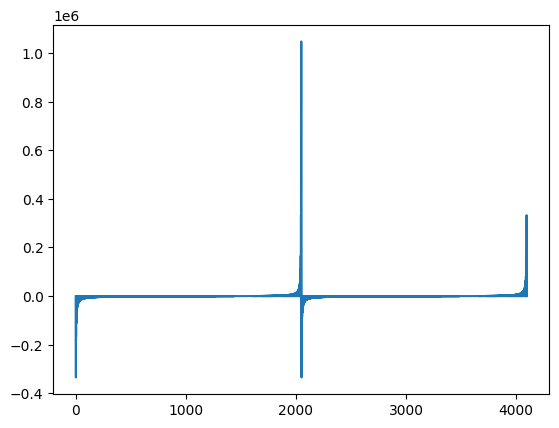

In [52]:
 
buffer = df_x[" im"].tolist()
buffer.reverse()
buffer += df_x["re"].tolist()
# .append(list(df_x["re"]))
print(buffer)
plt.plot([i for i in range(len(buffer))], buffer)
plt.plot()
res = fft.ifft(buffer)
plt.plot([i for i in range(len(res))], res)